In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

from matplotlib import pyplot as plt

In [2]:
from sklearn.datasets import load_boston
import pandas as pd
data = pd.read_csv(load_boston()['filename'],skiprows=1)
print(load_boston()['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [3]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
# для начала проверим , если ли отсутствующие значения
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [5]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


(array([439.,  44.,  14.,   1.,   3.,   2.,   0.,   1.,   1.,   1.]),
 array([6.3200000e-03, 8.9033080e+00, 1.7800296e+01, 2.6697284e+01,
        3.5594272e+01, 4.4491260e+01, 5.3388248e+01, 6.2285236e+01,
        7.1182224e+01, 8.0079212e+01, 8.8976200e+01]),
 <a list of 10 Patch objects>)

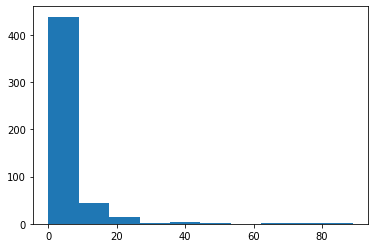

In [6]:
# 1 переменная CRIM(уровень преступности на душу населения) - безусловно важная переменная и ее мы точно оставляем
plt.hist(data['CRIM'])
# на основании частотного графика мы видим , что значения свыше 60 на выборку не повлияют , поэтому их уберем

In [9]:
data1 = data.loc[data.CRIM <= 60.00000]
data1.head()
data1.shape
# по результатам чистки первого столбца - убрали 3 строки и получили 503


(503, 14)

(array([369.,  12.,  48.,  16.,  13.,   6.,   4.,   6.,  19.,  10.]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]),
 <a list of 10 Patch objects>)

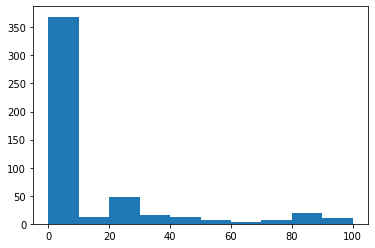

In [10]:
# 2 ZN(непонятная мне переменная даже из уст переводчика), поэтому оставим ее без изменений
plt.hist(data1['ZN'])

In [11]:
# 3 INDUS (доля площадей не для ретейла, то есть доля площадей под офисы для бизнеса), тоже важная величина ,
# так как это может влиять на то как быстро человек будет добираться до работы
data1['INDUS'].value_counts() # этого мало, построим график


18.10    129
19.58     30
8.14      22
6.20      18
21.89     15
        ... 
1.21       1
4.15       1
2.02       1
2.01       1
4.00       1
Name: INDUS, Length: 76, dtype: int64

(array([ 56.,  95.,  99.,  44.,  20.,   3., 129.,  45.,   0.,  12.]),
 array([ 0.46 ,  3.188,  5.916,  8.644, 11.372, 14.1  , 16.828, 19.556,
        22.284, 25.012, 27.74 ]),
 <a list of 10 Patch objects>)

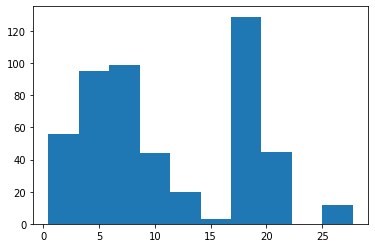

In [12]:
plt.hist(data1['INDUS'])
# по графику видно, что нет определенной закономерности для сортировки, поэтому столбец оставляем без изменений
# могу рпедположить , что столбец можем убрать


In [15]:
# удалим рассмотренный выше столбец
#data1.drop(['INDUS'], axis=1, inplace=True)
data1.head() 

,CRIM,ZN,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [17]:
# 4 CHAS(где 1 = соседство с рекой, 0 = в обратном случае)так как здесь 2 возможных результата (0 или 1)
# посчитаем кол-во домов у реки и не у реки
data1['CHAS'].value_counts()
# в результате мы видим, что домов у реки всего лишь 35 (менее 10 % от общей выборки) - убираем
data4 = data1.loc[data.CHAS == 0]
data4.head()
data4.shape

(468, 13)

In [18]:
# 5 NOX(концентрация оксида азота) - есть подтверждения, что концентрация углекислого газа влияет на цену 
# недвижимости, а не концентрация оксида азота, поэтому удаляем столбец
#data4.drop(['NOX'], axis=1, inplace=True)
data4.head()

,CRIM,ZN,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


(array([  2.,   4.,  13.,  37., 155., 156.,  59.,  24.,  10.,   8.]),
 array([3.561 , 4.0774, 4.5938, 5.1102, 5.6266, 6.143 , 6.6594, 7.1758,
        7.6922, 8.2086, 8.725 ]),
 <a list of 10 Patch objects>)

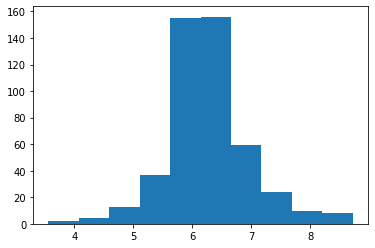

In [19]:
# 6 RM(среднее количество комнат) , безусловно важный параметр
data4['RM'].value_counts()
plt.hist(data4['RM']) # по графику видим нормальное распределение , оставим столбец без изменений

(array([ 14.,  31.,  27.,  41.,  30.,  34.,  37.,  40.,  63., 151.]),
 array([  2.9 ,  12.61,  22.32,  32.03,  41.74,  51.45,  61.16,  70.87,
         80.58,  90.29, 100.  ]),
 <a list of 10 Patch objects>)

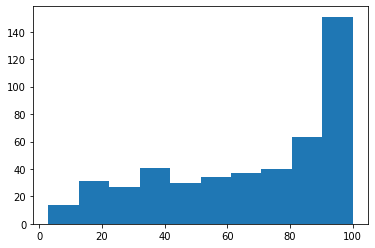

In [20]:
# 7 AGE(доля строений построенных до 1940 года)
data4['AGE'].value_counts()
plt.hist(data4['AGE'])# по графику видим, что от 0 до 80 идет примерно одинаковое кол-во, 
# поэтому сортировать не имеет смысла, и предположим что это не повлияет на стоимость домов
#(либо можем построить модель на новые и старые дома отдельно)


In [22]:
data4.drop(['AGE'], axis=1, inplace=True)
data4.head()


,CRIM,ZN,CHAS,NOX,RM,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,0,0.538,6.575,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,0,0.469,6.421,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,0,0.469,7.185,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,0,0.458,6.998,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,0,0.458,7.147,6.0622,3,222,18.7,396.90,5.33,36.2


(array([134., 105.,  71.,  56.,  45.,  26.,  19.,   7.,   4.,   1.]),
 array([ 1.137  ,  2.23595,  3.3349 ,  4.43385,  5.5328 ,  6.63175,
         7.7307 ,  8.82965,  9.9286 , 11.02755, 12.1265 ]),
 <a list of 10 Patch objects>)

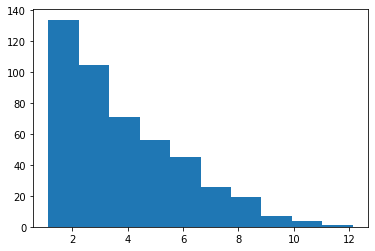

In [23]:
# 8 DIS(среднее растояние до 5 Бостонских центров занятости), тоже немаловажная величина
data4['DIS'].value_counts()
plt.hist(data4['DIS']) # оставляем без изменений

In [24]:
# 9 RAD(индекс доступности радиальных магистралей)тоже немаловажный параметр, оставляем
data4['RAD'].value_counts()

24    121
5     104
4     102
3      36
6      26
2      24
8      19
1      19
7      17
Name: RAD, dtype: int64

In [25]:
data4.loc[data4['RAD'].isin([1, 2, 3]), 'RAD'] = 2 # выберем среднее значение
data4.loc[data4['RAD'].isin([6, 7, 8]), 'RAD'] = 7 # выберем среднее значение
data4['RAD'].value_counts()


/Users/mihailprihodko/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


24    121
5     104
4     102
2      79
7      62
Name: RAD, dtype: int64

In [40]:
# 10 TAX(налоговая ставка на имущество), имеется значение(666), которое сильно отличается от всех 
# других(предполагаю, что это выброс - удаляю)
data4['TAX'].value_counts()
#plt.hist(data4['TAX'])


666    121
307     35
403     23
437     15
304     14
      ... 
241      1
285      1
244      1
280      1
469      1
Name: TAX, Length: 65, dtype: int64

In [41]:
data5 = data4.loc[data.TAX <= 500.00000]
data5.head()
data5.shape

(342, 12)

(array([15.,  1., 50., 15., 32., 61., 69., 35., 46., 18.]),
 array([12.6 , 13.54, 14.48, 15.42, 16.36, 17.3 , 18.24, 19.18, 20.12,
        21.06, 22.  ]),
 <a list of 10 Patch objects>)

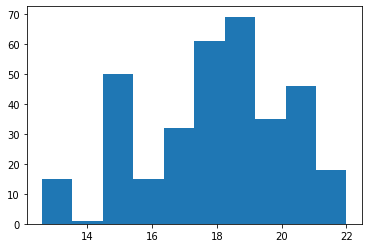

In [42]:
# 11 PTRATIO(соотношение учеников и учителей), важный показатель
data5['PTRATIO'].value_counts()
plt.hist(data5['PTRATIO'])# оставляем без изменений

(array([  2.,   0.,   0.,   2.,   2.,   4.,   3.,   3.,  17., 309.]),
 array([ 70.8 , 103.41, 136.02, 168.63, 201.24, 233.85, 266.46, 299.07,
        331.68, 364.29, 396.9 ]),
 <a list of 10 Patch objects>)

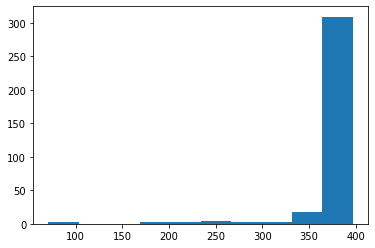

In [43]:
# 12 B(доля чернокожего населения) могу предположить, что этот показатель не важен(1 - это показывает график, 
# 2- недвижимость может приобретать как чернокожее население, так и другое), удаляем
data5['B'].value_counts()
plt.hist(data5['B'])

In [44]:
data5.drop(['B'], axis=1, inplace=True)
data5.head() 

,CRIM,ZN,CHAS,NOX,RM,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,0,0.538,6.575,4.0900,2,296,15.3,4.98,24.0
1,0.02731,0.0,0,0.469,6.421,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,0,0.469,7.185,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,0,0.458,6.998,6.0622,2,222,18.7,2.94,33.4
4,0.06905,0.0,0,0.458,7.147,6.0622,2,222,18.7,5.33,36.2


(array([53., 98., 75., 56., 30., 15.,  3.,  5.,  6.,  1.]),
 array([ 1.73 ,  4.998,  8.266, 11.534, 14.802, 18.07 , 21.338, 24.606,
        27.874, 31.142, 34.41 ]),
 <a list of 10 Patch objects>)

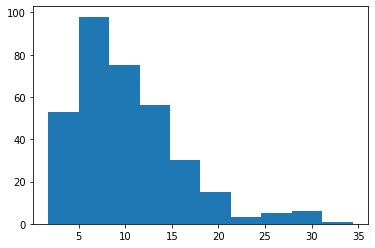

In [45]:
# 13 LSTAT(процент бедного населения) , важный показатель
data5['LSTAT'].value_counts()
plt.hist(data5['LSTAT']) # оставляем без изменений

In [49]:
# ранее предположил, что удаленность от реки не важна, но столбец не удалил
data5['CHAS'].value_counts() # так мы ранее удалили из выборки дома у реки, столбец не имеет смысла
data5.drop(['CHAS'], axis=1, inplace=True)
data5.head() # итоговая выборка

,CRIM,ZN,NOX,RM,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,0.538,6.575,4.0900,2,296,15.3,4.98,24.0
1,0.02731,0.0,0.469,6.421,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,0.469,7.185,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,0.458,6.998,6.0622,2,222,18.7,2.94,33.4
4,0.06905,0.0,0.458,7.147,6.0622,2,222,18.7,5.33,36.2


(array([ 26.,  62., 102.,  59.,  29.,  23.,  17.,   5.,   7.,  12.]),
 array([11.8 , 15.62, 19.44, 23.26, 27.08, 30.9 , 34.72, 38.54, 42.36,
        46.18, 50.  ]),
 <a list of 10 Patch objects>)

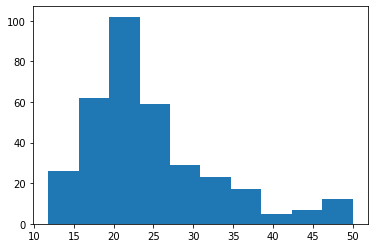

In [52]:
# 14 MEDV(средняя стоимость домов в 1000 дол)
data5['MEDV'].value_counts()
plt.hist(data5['MEDV'])

In [54]:
# судя по графику мы видим значения, которые очень видны при нормальном распределении(значения больше 45)
data6 = data5.loc[data.MEDV <= 45.00000]
data6.head()
data6.shape
# data6 - итоговая выборка

(329, 10)

In [56]:
from sklearn.preprocessing import StandardScaler

stand_scaler = StandardScaler()

In [63]:
X = data6.drop(['MEDV'],axis = 1)
y = data6['MEDV']

In [64]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [67]:
# обученная модель на очищенных данных
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

train_predict = lin_reg.predict(X_train)
test_predict = lin_reg.predict(X_test)

print('Train MAE: {}'.format(mean_absolute_error(train_predict, y_train)))
print('Test MAE: {}'.format(mean_absolute_error(test_predict, y_test)))

Train MAE: 2.053037013035585
Test MAE: 2.778412445402873


In [69]:
X_1 = data.drop(['MEDV'],axis = 1)
y_1 = data['MEDV']

In [70]:
X_1train, X_1test, y_1train, y_1test = train_test_split(X_1, y_1)

In [71]:
# модель на первоначальных данных 
lin_reg = LinearRegression()
lin_reg.fit(X_1train, y_1train)

train_predict = lin_reg.predict(X_1train)
test_predict = lin_reg.predict(X_1test)

print('Train MAE: {}'.format(mean_absolute_error(train_predict, y_1train)))
print('Test MAE: {}'.format(mean_absolute_error(test_predict, y_1test)))

Train MAE: 3.312222339171572
Test MAE: 3.359849980801134
